# Evaluating User trials

In [24]:
%matplotlib widget
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from scipy.stats import *

In [25]:
methods = ['Base-IK', 'MILD', 'MILD-IK']
labels = ["Pleasantness", "Excitement level", "Human-likeness", "Naturalness", "Friendliness", "Comfort", "Timing", "Accuracy", "Annoyance", "Aggression", "Awkwardness", "Scariness", "Satisfaction", "Effortlessness between\nthe two trials", "Habituation to the\nrobot between the two trials", "I had to change the way\nI act to get the robot\nto respond correctly"]
baseik_values = np.array([list(map(float,i.split('\t'))) for i in """4	3	3	4	4	3	3	3	2	2	2	2	3	4	4	3
4	4	4	3	5	4	4	3	1	1	2	1	4	4	4	5
4	5	4	5	4	3	4	4	1	1	2	1	4	4	4	2
5	5	5	5	5	5	5	5	1	1	1	1	5	5	5	4
3	3	2	3	3	3	2	2	1	1	2	1	3	1	2	1
5	5	4	4	5	5	5	5	1	1	1	1	5	1	5	1
4	5	2	2	4	3	2	3	1	1	1	1	4	2	2	4
3	4	2	2	3	2	4	2	1	1	2	1	3	3	5	1
4	4	3	4	4	3	5	5	2	1	2	1	4	3	3	2
3	3	2	2	2	2	4	2	3	1	4	1	2	4	4	5
2	3	2	4	5	4	4	3	2	1	3	1	3	4	4	4
4	4	4	3	4	4	4	3	2	1	1	1	4	5	5	2""".split('\n')])
baseik_ranks = np.array(list(map(float,"""3
1
2
2
2
1
2
3
2
3
2
1""".split('\n'))))
baseik_hatch = '.'

mild_values = np.array([list(map(float,i.split('\t'))) for i in """5	5	4	4	4	3	3	4	2	2	3	2	4	5	5	4
4	4	3	3	4	4	4	2	1	1	4	1	4	3	3	4
3	3	2	3	2	2	3	2	3	1	4	1	2	3	2	4
5	5	4	5	5	5	5	5	1	1	1	1	5	5	5	4
3	4	2	3	3	3	2	2	1	1	2	1	3	1	4	1
2	2	1	2	3	4	2	2	4	1	3	2	2	3	3	4
4	4	2	1	4	4	2	1	1	1	1	1	2	2	2	3
4	3	4	3	5	4	4	4	1	1	1	1	4	3	3	1
3	4	3	2	4	3	5	2	1	1	2	1	4	4	4	4
5	4	4	4	4	4	5	5	1	1	3	1	4	4	4	1
4	3	2	2	4	3	2	1	2	2	3	1	2	2	2	4
3	3	3	2	3	3	3	4	2	3	5	2	1	3	2	5""".split('\n')])
mild_ranks = np.array(list(map(float,"""2
3
3
3
3
3
3
2
3
1
3
2""".split('\n'))))
mild_hatch = '//'

mildik_values = np.array([list(map(float,i.split('\t'))) for i in """5	5	5	4	5	4	5	4	1	1	2	1	4	5	5	4
4	5	4	3	4	4	5	4	1	1	4	1	4	5	4	4
4	5	4	4	4	4	4	4	1	3	2	2	4	4	4	1
5	5	5	5	5	5	5	5	1	1	1	1	5	5	5	4
3	3	2	3	4	4	2	2	1	1	3	1	4	1	4	1
4	4	3	4	4	5	4	4	2	1	1	1	4	1	1	2
4	4	3	3	4	4	4	3	1	1	1	1	4	4	4	4
3	3	3	3	4	4	5	4	1	1	1	1	4	4	5	4
4	4	3	4	3	4	5	4	2	1	3	1	4	5	4	2
3	4	3	3	4	4	5	5	1	1	4	1	3	5	4	2
4	4	4	4	4	4	4	3	2	1	2	2	4	4	4	3
2	4	2	2	3	2	3	2	3	4	4	2	4	5	5	5""".split('\n')])
mildik_ranks = np.array(list(map(float,"""1
2
1
1
1
2
1
1
1
2
1
3""".split('\n'))))
mildik_hatch = '*'

legend_props = { "size": 15, "weight":"bold" }

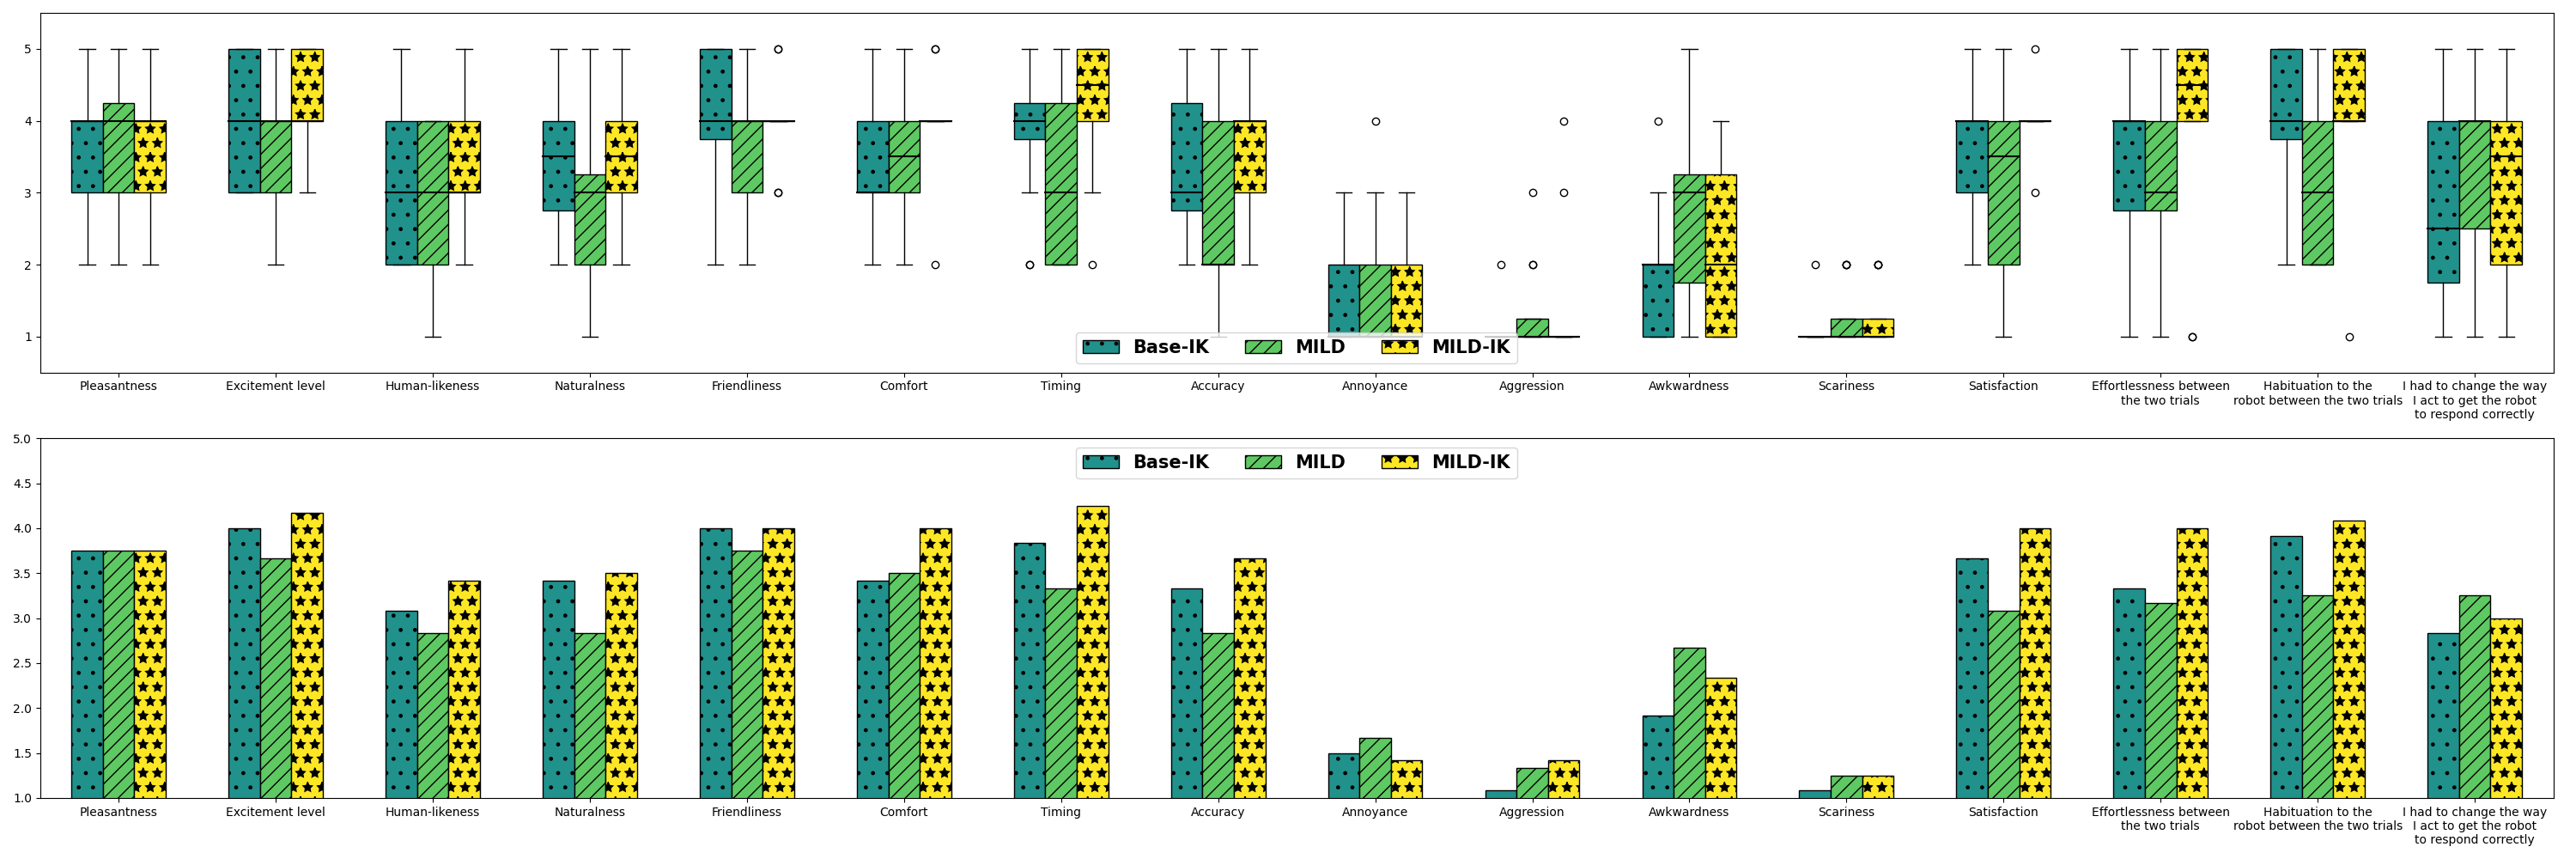

In [26]:

fig = plt.figure(figsize=(30,10))
ax_box = plt.subplot(2,1,1)
ax_bar = plt.subplot(2,1,2)

width = 0.2
colors = get_cmap()(np.linspace(0.5,1,3))
for i in range(len(labels)):
    bp1 = ax_box.boxplot(baseik_values[:, i], positions=[i-width], showfliers=True, widths=[width], patch_artist = True,
		   boxprops = dict(facecolor=colors[0]), 
		   medianprops = dict(color = "black", linewidth = 1.5))
    bp1["boxes"][0].set(hatch=baseik_hatch)
    bp2 = ax_box.boxplot(mild_values[:, i], positions=[i], showfliers=True, widths=[width], patch_artist = True,
		   boxprops = dict(facecolor=colors[1]), 
		   medianprops = dict(color = "black", linewidth = 1.5))
    bp2["boxes"][0].set(hatch=mild_hatch)
    bp3 = ax_box.boxplot(mildik_values[:, i], positions=[i+width], showfliers=True, widths=[width], patch_artist = True,
		   boxprops = dict(facecolor=colors[2]), 
		   medianprops = dict(color = "black", linewidth = 1.5))
    bp3["boxes"][0].set(hatch=mildik_hatch)

ax_bar.bar(np.arange(len(labels))-width, baseik_values.mean(0), color=colors[0], width=width, label=methods[0], edgecolor='k', hatch=baseik_hatch)
ax_bar.bar(np.arange(len(labels)), mild_values.mean(0), color=colors[1], width=width, label=methods[1], edgecolor='k', hatch=mild_hatch)
ax_bar.bar(np.arange(len(labels))+width, mildik_values.mean(0), color=colors[2], width=width, label=methods[2], edgecolor='k', hatch=mildik_hatch)

    
ax_box.set_xticks(np.arange(len(labels)), labels)
ax_bar.set_xticks(np.arange(len(labels)), labels)
ax_box.set_ylim(0.5,5.5)
ax_bar.set_ylim(1,5)
ax_box.set_xlim(-0.5, len(labels) - 0.5)
ax_bar.set_xlim(-0.5, len(labels) - 0.5)
ax_box.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], methods, loc='lower center', ncol=3, prop=legend_props)
ax_bar.legend(loc='upper center', ncol=3, prop=legend_props)
plt.tight_layout()
plt.show()


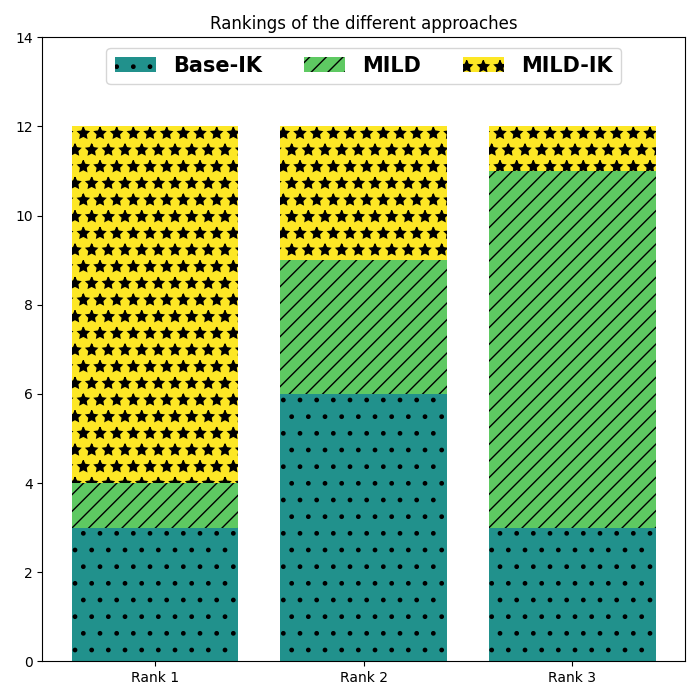

In [27]:
ranks = np.zeros((3,3))

ranks[0,0] = len(np.where(baseik_ranks==1)[0])
ranks[0,1] = len(np.where(baseik_ranks==2)[0])
ranks[0,2] = len(np.where(baseik_ranks==3)[0])

ranks[1,0] = len(np.where(mild_ranks==1)[0])
ranks[1,1] = len(np.where(mild_ranks==2)[0])
ranks[1,2] = len(np.where(mild_ranks==3)[0])

ranks[2,0] = len(np.where(mildik_ranks==1)[0])
ranks[2,1] = len(np.where(mildik_ranks==2)[0])
ranks[2,2] = len(np.where(mildik_ranks==3)[0])

# plot bars in stack manner
plt.figure(figsize=(7,7))
plt.bar(np.arange(3), ranks[0], color=colors[0], hatch=baseik_hatch, label=methods[0])
plt.bar(np.arange(3), ranks[1], bottom=ranks[0], color=colors[1], hatch=mild_hatch, label=methods[1])
plt.bar(np.arange(3), ranks[2], bottom=ranks[0]+ranks[1], color=colors[2], hatch=mildik_hatch, label=methods[2])
plt.ylim(0,ranks[0].sum()+2)
plt.xticks([0,1,2], ['Rank 1', 'Rank 2', 'Rank 3'])
plt.legend(loc='upper center', ncol=3, prop=legend_props)
plt.title("Rankings of the different approaches")
plt.tight_layout()
plt.show()

